# Welcome to deepracer analysis


## 1. Generate training simulation images according to csv file

<br />
This feature will generate images from csv files based on your training model and will provide you with images of the selected track for referance and comparison.

Run this code if it's your first time using this notebook:

                                  pip install deepracer-utils

#### Follow these steps step by step
1. Log in to deepracer console
2. Select your training models on the left
3. Choose your model
4. Select the teaining mode
5. Download your training logs
6. Unzip your log files

#### Run the code in the following unit and select your csv file and track name.

###  <span style="color: green;">What is training mode and what is evaluation mode? </span>


#### In AWS DeepRacer, training mode and evaluation mode are two separate phases for training and evaluating the performance of the reinforcement learning agent. Here are the main differences:

#### Training mode：
1. In training mode, the agent (DeepRacer vehicle) interacts with the environment (the track) and learns a strategy. It optimizes this strategy by trying different actions and observing the results.
2. The training mode involves a balance between exploration and exploitation. Exploration is when an agent tries a new action to find the best possible strategy, while exploitation is when an agent chooses an action based on a learned strategy.
3. The goal of the training mode is for the agent to learn and find the optimal strategy through as much trial and error as possible. The performance of the agent may be erratic during training.

#### Evaluation mode：
1. The evaluation mode is conducted after the training is complete. In the evaluation mode, the agent performs actions in the environment (on the track) based on strategies learned during the training phase.
2. In evaluation mode, the agent focuses on exploiting learned strategies rather than continuing to explore new actions. As a result, there is little or no exploration under the assessment model.
3. The goal of the evaluation pattern is to measure the agent's performance against the learned strategy. It helps you see if the training process works and how the agent performs in real life.

In conclusion, the training model focuses on the process of learning strategies, while the evaluation model focuses on the performance of learned strategies in practice. In the context of DeepRacer, the training mode is used to optimize the agent's behavior, while the evaluation mode is used to measure its performance on the track.

When you have run the following code, you will get a drop down box and a button. Select your training map from the drop down box and click the button to upload your csv file

In [7]:
# import numpy as np
# import pandas as pd
# import io
# import os
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display

# output_track = widgets.Output()
# output_trajectory = widgets.Output()
# output_container = widgets.HBox([output_track, output_trajectory])

# def list_npy_files(directory):
#     return [f for f in os.listdir(directory) if f.endswith('.npy')]

# npy_directory = 'maps'  # Replace with your directory path
# npy_files = list_npy_files(npy_directory)

# npy_selector = widgets.Dropdown(
#     options=npy_files,
#     description='Select .npy:',
#     style={'description_width': 'initial'}
# )

# def plot_track(track_data):
#     with output_track:
#         output_track.clear_output(wait=True)
#         inner_waypoints = track_data[:, 0:2]
#         outer_waypoints = track_data[:, 2:4]
#         plt.plot(inner_waypoints[:, 0], inner_waypoints[:, 1], 'r', label='Inner Waypoints')
#         plt.plot(outer_waypoints[:, 0], outer_waypoints[:, 1], 'b', label='Outer Waypoints')
#         plt.xlabel('X')
#         plt.ylabel('Y')
#         plt.title('DeepRacer Track')
#         plt.legend()
#         plt.show()

# def on_npy_selected(change):
#     selected_file = change['new']
#     track_data = np.load(os.path.join(npy_directory, selected_file))
#     plot_track(track_data)

# npy_selector.observe(on_npy_selected, names='value')

# def plot_car_trajectory(df):
#     with output_trajectory:
#         output_trajectory.clear_output(wait=True)
#         plt.scatter(df['X'], df['Y'], c=df.index, cmap='viridis', s=1)
#         plt.colorbar(label='Time step')
#         plt.xlabel('X')
#         plt.ylabel('Y')
#         plt.title('Car Trajectory')
#         plt.show()

# def on_csv_uploaded(change):
#     csv_data = change['new'][0]['content']
#     car_data = pd.read_csv(io.BytesIO(csv_data))
#     plot_car_trajectory(car_data)

# csv_uploader = widgets.FileUpload(
#     accept='.csv',
#     multiple=False,
#     description='Upload .csv',
#     style={'description_width': 'initial'}
# )
# csv_uploader.observe(on_csv_uploaded, names='value')

# display(npy_selector)
# display(csv_uploader)
# display(output_container)

Dropdown(description='Select .npy:', options=('2022_april_open.npy', '2022_april_pro.npy', '2022_august_open.n…

FileUpload(value=(), accept='.csv', description='Upload .csv')

In [11]:
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

output_track = widgets.Output()
output_trajectory = widgets.Output()
output_container = widgets.HBox([output_track, output_trajectory])

def list_npy_files(directory):
    return [f for f in os.listdir(directory) if f.endswith('.npy')]

npy_directory = 'maps'  # Replace with your directory path
npy_files = list_npy_files(npy_directory)

npy_selector = widgets.Dropdown(
    options=npy_files,
    description='Select .npy:',
    style={'description_width': 'initial'}
)

output_dir = 'saved_images'

def plot_track(track_data):
    with output_track:
        output_track.clear_output(wait=True)
        inner_waypoints = track_data[:, 0:2]
        outer_waypoints = track_data[:, 2:4]
        plt.plot(inner_waypoints[:, 0], inner_waypoints[:, 1], 'r', label='Inner Waypoints')
        plt.plot(outer_waypoints[:, 0], outer_waypoints[:, 1], 'b', label='Outer Waypoints')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('DeepRacer Track')
        plt.legend()
        plt.savefig(os.path.join(output_dir, 'track.png'))  # Save the plot
        plt.show()  # Display the plot
        

def on_npy_selected(change):
    selected_file = change['new']
    track_data = np.load(os.path.join(npy_directory, selected_file))
    plot_track(track_data)

npy_selector.observe(on_npy_selected, names='value')

def plot_car_trajectory(df):
    with output_trajectory:
        output_trajectory.clear_output(wait=True)
        plt.scatter(df['X'], df['Y'], c=df.index, cmap='viridis', s=1)
        plt.colorbar(label='Time step')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Car Trajectory')
        plt.savefig(os.path.join(output_dir, 'car_trajectory.png'))  # Save the plot
        plt.show()  # Display the plot

def on_csv_uploaded(change):
    csv_data = change['new'][0]['content']
    car_data = pd.read_csv(io.BytesIO(csv_data))
    plot_car_trajectory(car_data)

csv_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=False,
    description='Upload .csv',
    style={'description_width': 'initial'}
)
csv_uploader.observe(on_csv_uploaded, names='value')

display(npy_selector)
display(csv_uploader)
display(output_container)


Dropdown(description='Select .npy:', options=('2022_april_open.npy', '2022_april_pro.npy', '2022_august_open.n…

FileUpload(value=(), accept='.csv', description='Upload .csv')

In [5]:
import tempfile
import shutil

def on_log_uploaded(change):
    global fname
    uploaded_file = change['new'][0]
    file_name = uploaded_file['name']
    content = uploaded_file['content']
    temp_dir = tempfile.mkdtemp()
    temp_file_path = os.path.join(temp_dir, file_name)
    with open(temp_file_path, 'wb') as f:
        f.write(content)
    fname = temp_file_path

log_uploader = widgets.FileUpload(
    accept='.log',
    multiple=False,
    description='Upload .log',
    style={'description_width': 'initial'}
)
log_uploader.observe(on_log_uploaded, names='value')

display(log_uploader)

FileUpload(value=(), accept='.log', description='Upload .log')

#### Upload your log files, and copy the name of the log files into the 'fname'

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from deepracer.tracks import TrackIO, Track
from deepracer.logs import \
    SimulationLogsIO as slio, \
    PlottingUtils as pu,\
    AnalysisUtils as au   #, \

import warnings
warnings.filterwarnings('ignore')
tu = TrackIO()


#### Running the following code will give you a slider bar, which you can swipe to change episode to the value you set during training

###  <span style="color: green;">What is episodes</span>

EPISODES_PER_ITERATION is a hyper-parameter that represents the number of episodes that get executed in each training iteration. In each episode, the agent (in this case the AWS DeepRacer vehicle) starts at the initial state of the environment and collects rewards by performing a series of actions until a termination condition is reached (such as completing a track or reaching a maximum number of steps). The reinforcement learning algorithm is trained in multiple episodes to keep the agent learning and optimizing its policy.

###  <span style="color: green;">How do I choose the right episode</span>

Here are some ideas to help you select the right values for EPISODES_PER_ITERATION:

1. **Training time:** A larger value of EPISODES_PER_ITERATION means that more episodes are executed per iteration, which can result in longer training times. If you want to complete the training in a limited amount of time, you can try reducing this value. Note, however, that a lower value may affect the agent's ability to learn effective policies.
<br />

2. **Computing resources:** Higher values for EPISODES_PER_ITERATION increase computing requirements. If you are training in an environment with limited computing resources, consider using a lower value. It is also worth noting that an increase in computing resources direty correlates to an increased cost on the DeepRacer platform. However, reducing this value may affect the training effect.
<br />

3. **Algorithm convergence rate:** You need to adjust the value of EPISODES_PER_ITERATION based on how fast the training algorithm converges. For algorithms that converge slowly, adding EPISODES_PER_ITERATION might help them learn strategies better. However, lower values may be sufficient for fast convergence algorithms
<br />

###  <span style="color: green;">How do I set this value in the deepracer console?</span>

In the AWS DeepRacer console, this value is called "Episodes Between Training". To change this value, follow these steps:

1. Log in to the AWS console and navigate to the DeepRacer service.
<br />

2. Click "Create model" (if you are creating a new model) or select an existing model and click "Edit model" (if you want to change Settings for an existing model).
<br />
3. In the "Hyperparameters" section of the "Model settings" page, locate the "Episodes Between Training" setting.
<br />
4. Enter the values you want to use, then proceed with the other Settings and start training.
<br />

###  <span style="color: green;">What does each chart mean separately? How should we analyze it?</span>
<span style="color: green;">chart 1：</span>
<br />
This graph shows the average reward value in each training iteration. The X-axis is the number of iterations, and the Y-axis is the average reward value.

The analysis of this diagram will help you understand the training progress of the model and the performance of each iteration. If you see a significant improvement in the average reward value with each iteration, this indicates that the model is constantly learning and optimizing its strategy, which is a good sign. If the average reward value stagnates or declines, then it may be necessary to adjust the hyperparameters or reevaluate the training data to improve the performance of the model.

In addition, you can observe if there are any wild fluctuations in reward values. If the reward value fluctuates sharply between iterations, it may be necessary to increase the training time or adjust other hyperparameters to obtain a smoother and more stable training curve.

<span style="color: green;">chart 2：</span>
<br />
This graph shows the relationship between the average time and the number of iterations in each training session.

The X-axis is the number of the interation, and the Y-axis is the average time. The analysis of this diagram can help you understand the training progress of the model and the efficiency of the training. If you see a significant improvement in average time in each iteration, this indicates that the model is becoming more efficient and learning faster strategies. If the average time stagnates or increases, then it may be necessary to consider adjusting the hyperparameters or reevaluating the training data to improve the performance of the model.

In addition, the relationship between observation time and the number of iterations is also very important. If the average time increases with the number of iterations, then this indicates that the model is having difficulty learning and needs more time to adjust and learn. If there is a positive correlation between the average time and the number of iterations, it may be necessary to increase the training time or adjust other hyperparameters to achieve better performance.

<span style="color: green;">chart 3：</span>
<br />
This graph shows the relationship between the average progress and the number of iterations per training session. The X-axis is the number of iterations, and the Y-axis is the average progress.

The analysis of this diagram can help you understand the training progress of the model and the efficiency of the training. If you see a significant improvement in average progress in each iteration, this indicates that the model is becoming more efficient and learning faster strategies. If average progress stalls or declines, then it may be necessary to adjust the hyperparameters or reevaluate the training data to improve the model's performance.

In addition, it is important to observe the relationship between the degree of progress and the number of iterations. If the degree of progress fluctuates sharply between iterations, it may be necessary to increase the training time or adjust other hyperparameters to obtain a smoother and more stable training curve. If the degree of progress declines as the number of iterations increases, the training data needs to be reevaluated or the parameters of the model adjusted to achieve better performance.

<span style="color: green;">chart 4：</span>
<br />
This graph shows the relationship between the standard deviation of the reward value and the number of iterations in each training isession. The X-axis is the number of iterations, and the Y-axis is the standard deviation of the reward value.

The analysis of this diagram can help you understand the training progress of the model and the efficiency of the training. If you see a significant reduction in the standard deviation of the reward value in each iteration, this indicates that the model is becoming more stable and learning better strategies. If the standard deviation increases, it may be necessary to consider adjusting the hyperparameters or reevaluating the training data to improve the performance and stability of the model.

In addition, it is important to observe the relationship between standard deviation and the number of iterations. If the standard deviation fluctuates sharply between iterations, it may be necessary to increase the training time or adjust other hyperparameters to obtain a smoother and more stable training curve. If the standard deviation increases with the number of iterations, the training data needs to be reevaluated or the parameters of the model adjusted for better performance and stability.

<span style="color: green;">chart 5：</span>
<br />
This graph shows the relationship between the standard deviation of execution time and the number of iterations in each training session. The X axis is the number of iterations, and the Y axis is the standard deviation of execution time.

The analysis of this diagram can help you understand the training progress of the model and the efficiency of the training. If you see a significant reduction in the standard deviation of execution time in each iteration, this indicates that the model is becoming more efficient and learning better strategies. If the standard deviation increases, it may be necessary to consider adjusting the hyperparameters or reevaluating the training data to improve the performance and stability of the model.

In addition, it is important to observe the relationship between standard deviation and the number of iterations. If the standard deviation fluctuates sharply between iterations, it may be necessary to increase the training time or adjust other hyperparameters to obtain a smoother and more stable training curve. If the standard deviation increases with the number of iterations, the training data needs to be reevaluated or the parameters of the model adjusted for better performance and stability.

<span style="color: green;">chart 6：</span>
<br />
This graph shows the relationship between the standard deviation of progress and the number of iterations in each training iteration. The X-axis is the number of iterations, and the Y-axis is the standard deviation of progress.

The analysis of this diagram can help you understand the training progress of the model and the stability of the training. If you see a significant reduction in the standard deviation of progress in each iteration, this indicates that the model is becoming more stable and learning better strategies. If the standard deviation increases, it may be necessary to consider adjusting the hyperparameters or reevaluating the training data to improve the performance and stability of the model.

In addition, it is important to observe the relationship between standard deviation and the number of iterations. If the standard deviation fluctuates sharply between iterations, it may be necessary to increase the training time or adjust other hyperparameters to obtain a smoother and more stable training curve. If the standard deviation increases with the number of iterations, the training data needs to be reevaluated or the parameters of the model adjusted for better performance and stability.

<span style="color: green;">chart 7：</span>
<br />
This scatter plot shows the total reward per episode in relation to the number of episodes. Where, the X-axis is the number of episodes, and the Y-axis is the total reward value of the corresponding episode.

In DeepRacer, the goal of the training was to get the DeepRacer vehicle to drive on a given track while receiving the highest possible reward (total reward). In each episode, the vehicle starts at the start of the track, chooses the best move based on its current state (including the vehicle's position, speed, orientation, etc.), performs that move, receives a reward, and then continues on the track until it reaches the end or exceeds the maximum number of steps. total reward is the sum of the rewards earned in all steps, which reflects the vehicle's performance in the episode.

The analysis of this figure will help you understand the performance and progress of the DeepRacer model during training. If the overall trend is for total reward to increase as the number of episodes increases, then this indicates that the model is gradually learning better strategies to drive better around the track and get higher rewards. If the overall trend is for total reward to decline or level off as the number of episodes increases, then it may be necessary to reevaluate the training data or adjust the parameters of the model to improve the performance and efficiency of the model.

In addition, the stability and reliability of the model can be understood by observing the distribution of the scatter plot. If most of the points are distributed in a relatively tight area, it indicates that the model is relatively stable from episode to episode. If the points are spread out, you may need to increase the training time or adjust the hyperparameters for better performance and stability.

<span style="color: green;">chart 8：</span>
<br />
This scatter plot shows the relationship between the average time to complete one lap of the track and the number of iterations in each training iteration. Where, X axis is the number of iterations, and Y axis is the average time to complete one lap of the track.

Time to complete a lap of the track was one of the important measures of model performance in DeepRacer, which reflected the efficiency and speed of the DeepRacer vehicle on the track. In each iteration, the DeepRacer vehicle was trained on a series of tracks with the goal of completing the course as quickly and efficiently as possible while maximizing the overall reward. Average lap time is an average of finish times across all tracks and reflects the performance of DeepRacer vehicles across tracks.

This analysis will help you understand how well the DeepRacer model mastered the track and how efficiently it worked during training. If the overall trend is that the average time to complete a lap of the track decreases with the number of iterations, this indicates that the model is gradually learning better strategies and is able to complete the track more quickly and efficiently. If the general trend is that the average time to complete a track lap increases with the number of iterations, then the training data may need to be reassessed or the model parameters adjusted to improve the model's performance and efficiency.

In addition, it is important to observe the relationship between the average lap time and the number of iterations. If the average time to complete a lap of the track fluctuates dramatically between iterations, it may be necessary to increase the training time or adjust other hyperparameters to obtain a smoother and more stable training curve. If the average time to complete a lap of the track tends to stabilize with the number of iterations, it may be necessary to increase training time or consider increasing training data to improve the performance and efficiency of the model.

<span style="color: green;">chart 9：</span>
<br />
This scatter plot shows the relationship between the competition rate and the number of iterations in each training iteration. Where, the X-axis is the number of iterations, and the Y-axis is the ratio of completed races.

The DeepRacer car is trained on a series of tracks with the goal of finishing the race as best as possible and achieving the highest possible race score. Race Completion ratio refers to the percentage of DeepRacer vehicles that successfully completed the race in each iteration.

This chart analysis will help you understand the success rate and competition performance of the DeepRacer model during training. If the overall trend is that the rate of race completion increases with the number of iterations, this indicates that the model is gradually learning better strategies and is able to complete the race more successfully. If the overall trend is for the rate of race completion to decrease with the number of iterations, it may be necessary to reevaluate the training data or adjust the parameters of the model to improve model performance and success.

In addition, it is important to observe the relationship between the ratio of completed races and the number of iterations. If the rate of race completion fluctuates sharply between iterations, it may be necessary to increase the training time or adjust other hyperparameters to get a smoother and more stable training curve. If the rate of race completion tends to level off as the number of iterations increases, it may be necessary to increase training time or consider increasing training data to improve the model's performance and success rate.


IntSlider(value=1, continuous_update=False, description='Episodes:', min=1)

new reward not found, using reward as its values
Number of episodes =  79
Number of iterations =  80


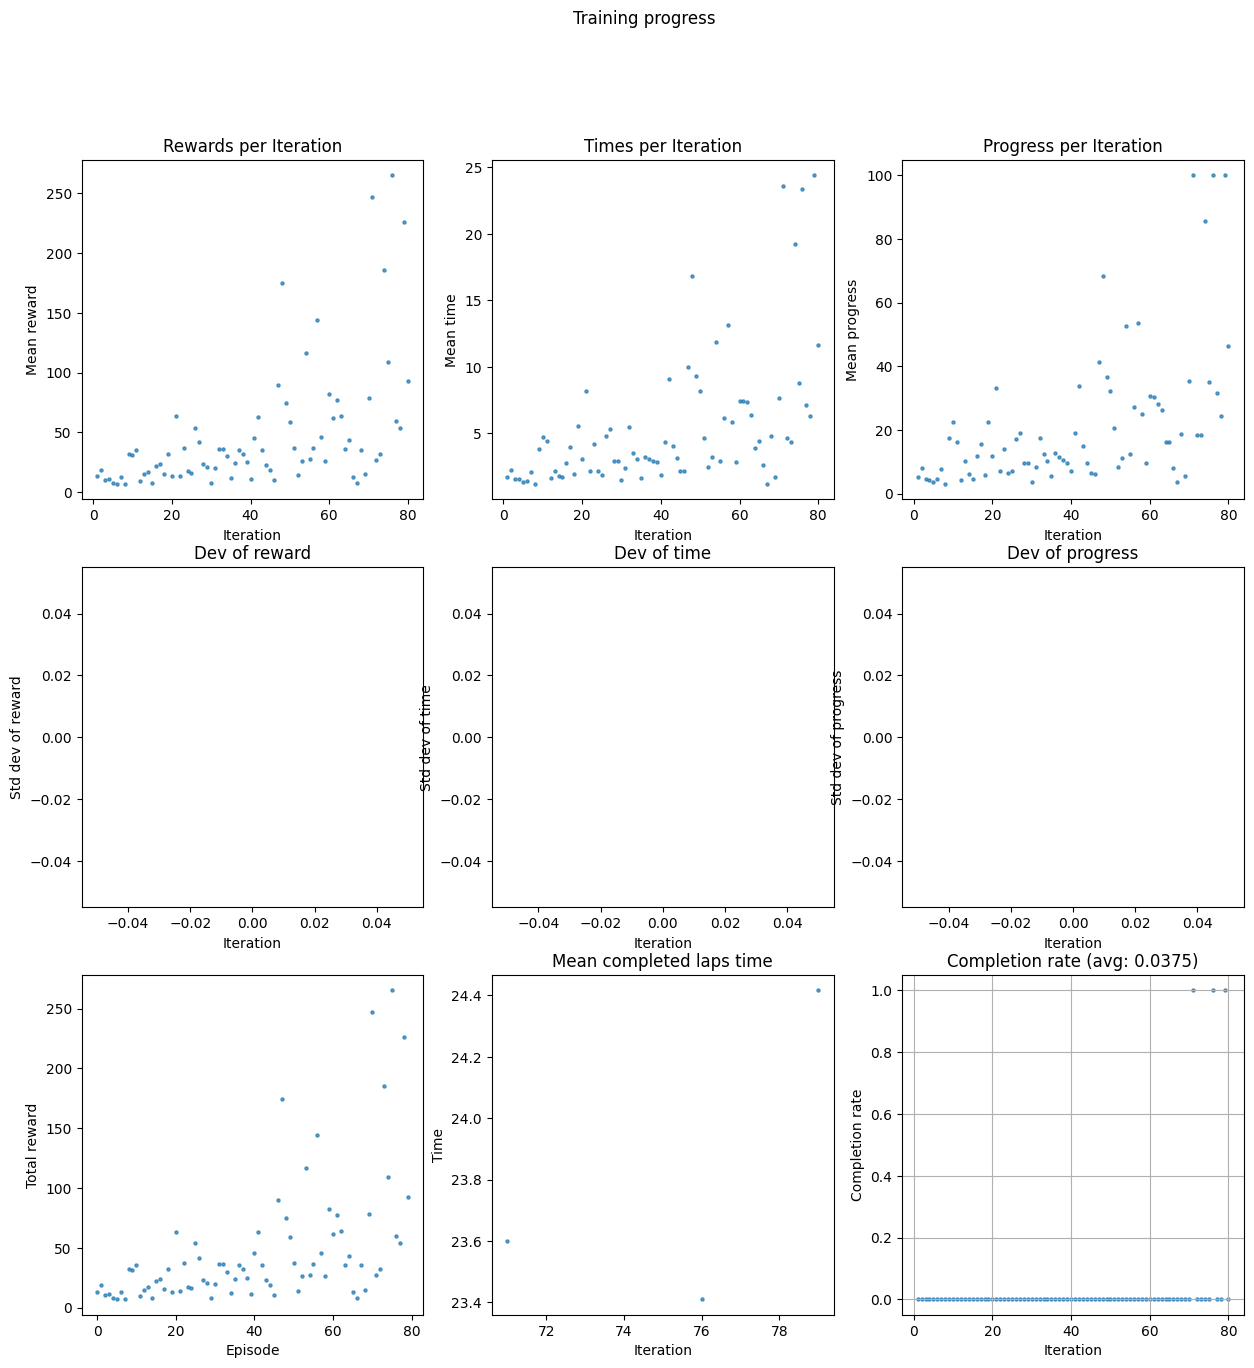

<Figure size 640x480 with 0 Axes>

new reward not found, using reward as its values
Number of episodes =  79
Number of iterations =  3


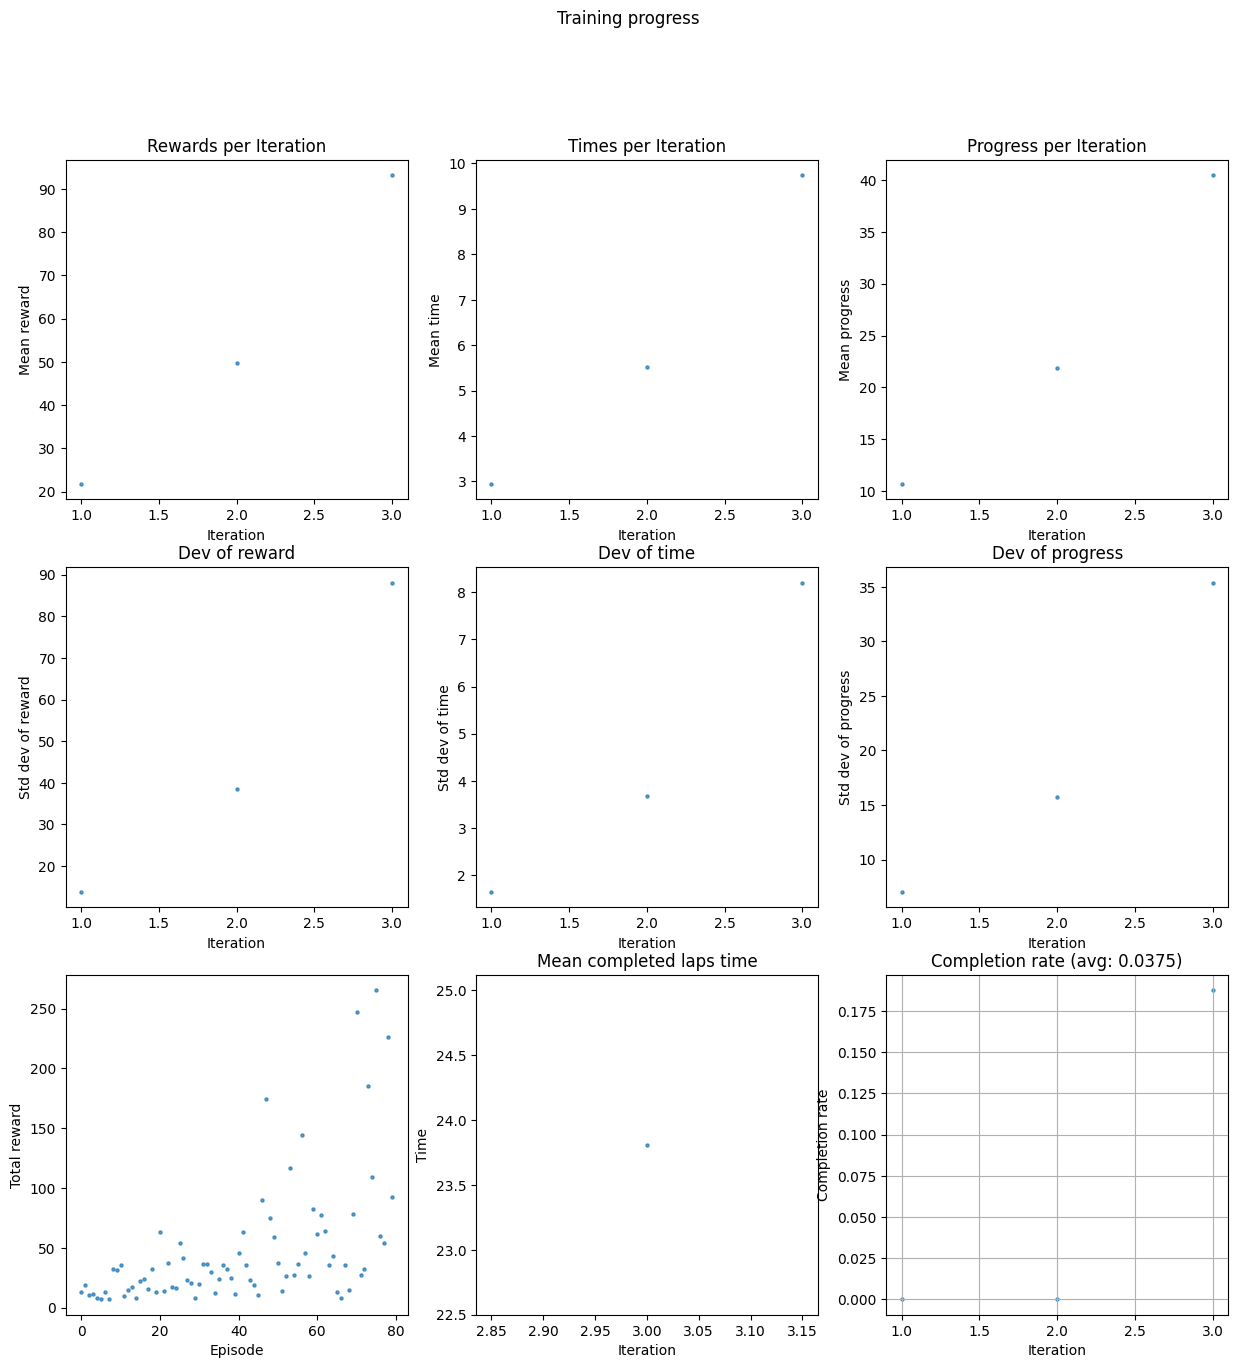

<Figure size 640x480 with 0 Axes>

In [6]:
EPISODES_PER_ITERATION = 1
episodes_slider = widgets.IntSlider(
    value=EPISODES_PER_ITERATION,
    min=1,
    max=100,
    step=1,
    description='Episodes:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def on_change(change):
    global EPISODES_PER_ITERATION
    EPISODES_PER_ITERATION = change['new']
    data = slio.load_data(fname)
    df = slio.convert_to_pandas(data, episodes_per_iteration=EPISODES_PER_ITERATION)

    df = df.sort_values(['episode', 'steps'])

    simulation_agg = au.simulation_agg(df)
    au.analyze_training_progress(simulation_agg, title='Training progress')

episodes_slider.observe(on_change, names='value')
display(episodes_slider)

data = slio.load_data(fname)
df = slio.convert_to_pandas(data, episodes_per_iteration=EPISODES_PER_ITERATION)

df = df.sort_values(['episode', 'steps'])
simulation_agg = au.simulation_agg(df)
au.analyze_training_progress(simulation_agg, title='Training progress')

###  <span style="color: green;">What does each chart mean separately? How should we analyze it?</span>
<span style="color: green;">chart 1：</span>
<br />
This scatter plot shows the relationship between time and progress rate across all races. Progress rate represents the progress that DeepRacer vehicles are able to complete over a period of time. Time on the X-axis and rate of progress on the Y-axis.

If the overall trend is a positive correlation between time and progress rate, it indicates that the model can complete more progress in a shorter time, which is a good performance. If the overall trend is a negative correlation between time and rate of progress, it indicates that the model takes more time to complete the same schedule, possibly because there are some problems with the model that require further adjustment.

In addition, observing the relationship between time and rate of progression can also help you identify any anomalies or outliers. If there are any outliers or outliers, further examination and analysis are required to determine if there are any problems or errors.

<span style="color: green;">chart 2：</span>
<br />
This scatter plot shows the relationship between time and steps over all races. Steps refers to the total number of steps completed by the DeepRacer vehicle in the race. Time on the X-axis and steps on the Y-axis.

If the overall trend is a positive correlation between time and number of steps, it indicates that the model can complete more steps in a shorter time, which is a good performance. If the overall trend is a negative correlation between time and steps, it indicates that the model takes more time to complete the same number of steps, possibly because there are some problems with the model that require further adjustment.

In addition, observing the relationship between time and number of steps can also help you identify any anomalies or outliers. If there are any outliers or outliers, further examination and analysis are required to determine if there are any problems or errors.

<span style="color: green;">chart 3：</span>
<br />
This scatter plot shows the relationship between time and total reward over all matches. The X-axis is time, and the Y-axis is total reward.

If the overall trend is a positive correlation between time and total reward, it indicates that the model can achieve a higher total reward in a shorter period of time, which is a good performance. If the general trend is a negative correlation between time and total reward, it indicates that the model takes more time to achieve the same total reward, possibly because there are some problems with the model that need to be adjusted further.

In addition, the relationship between observation time and total reward can also help you identify any anomalies or outliers. If there are any outliers or outliers, further examination and analysis are required to determine if there are any problems or errors.

<span style="color: green;">chart 4：</span>
<br />
Corresponding to Figure 1.

<span style="color: green;">chart 5：</span>
<br />
Corresponding to Figure 2.

<span style="color: green;">chart 6：</span>
<br />
This scatter plot shows the relationship between time and new_reward for all matches. The X-axis is time, and the Y-axis is new rewards. In DeepRacer, new rewards are rewards earned in each episode (race). It is a non-negative number and should increase gradually as the training progresses.

The analysis of this diagram will help you understand the progress of model training, as well as the model's performance and optimization direction. If the model gets better and better over the course of the match, then the new rewards should increase over time, which would show a positive correlation. If the performance of the model does not improve significantly, then the new rewards will remain the same or grow slowly, which will show up as a trend of level or low growth.

In addition, observing the relationship between new rewards and time can also help you identify any anomalies or outliers. If there are any outliers or outliers, further examination and analysis are required to determine if there are any problems or errors.

<span style="color: green;">chart 7：</span>
<br />
This scatter plot shows the relationship between the start time (start_at) and progress for the DeepRacer race. The X axis is the start time of the match, and the Y axis is the progress of the model during the match. Progress was measured in the DeepRacer race as how far the model moved on the track. The maximum progress depends on the length of the track set in the simulator, which can be viewed from the simulator Settings.

Each dot represents an episode. Its position on the Y-axis indicates the percentage of tracks completed by the agent in that episode. For example, if a point's progress value is 50%, then the agent has completed half of the track in that episode. Its position on the X-axis indicates when the episode started.

The analysis of this diagram can help you understand the performance and progress of the model in the competition. If the model makes higher progress in the race, then the model's performance can be considered improved and the progress is positive. If the model's progress in the competition does not improve significantly, then it can be assumed that the model needs further adjustment and optimization.

In addition, looking at the relationship between start time and schedule can also help you identify any anomalies or outliers. If there are any outliers or outliers, further examination and analysis are required to determine if there are any problems or errors.

<span style="color: green;">chart 8：</span>
<br />
This scatter plot shows the relationship between the start time of the DeepRacer race (start_at) and the time it takes to complete a lap (time_if_complete). The X axis is the start time of the race, and the Y axis is the time it takes the model to complete a lap.

Lap time was an important evaluation metric in the DeepRacer race, which indicated how long it took the model to complete a lap. The shorter it takes to complete a lap, the better the model performs in the race.

The analysis of this diagram can help you understand the performance and progress of the model in the competition. If the model completes a lap in a race in a shorter time, then the model's performance can be considered improved and the progress is positive. If the lap time of the model does not improve significantly in the race, then it can be considered that the model needs further adjustment and optimization.

In addition, looking at the relationship between the start time and the complete lap time can also help you identify any anomalies or outliers. If there are any outliers or outliers, further examination and analysis are required to determine if there are any problems or errors.

<span style="color: green;">chart 9：</span>
<br />
The X-axis of this scatter plot is start_at, the time the simulation started, and the Y-axis is reward, the value of the reward received in each simulation. This graph can be used to compare the rewards received in Deepracer simulations conducted over different time periods. You can observe whether the start time of simulation is related to the performance of the model, for example, whether a model with an earlier start time performs better, whether there is a specific time period that has a greater impact on performance, and so on. The process of analyzing this graph is similar to that of other scatter plots. Factors such as the distribution of reward values and the presence of outliers need to be considered.

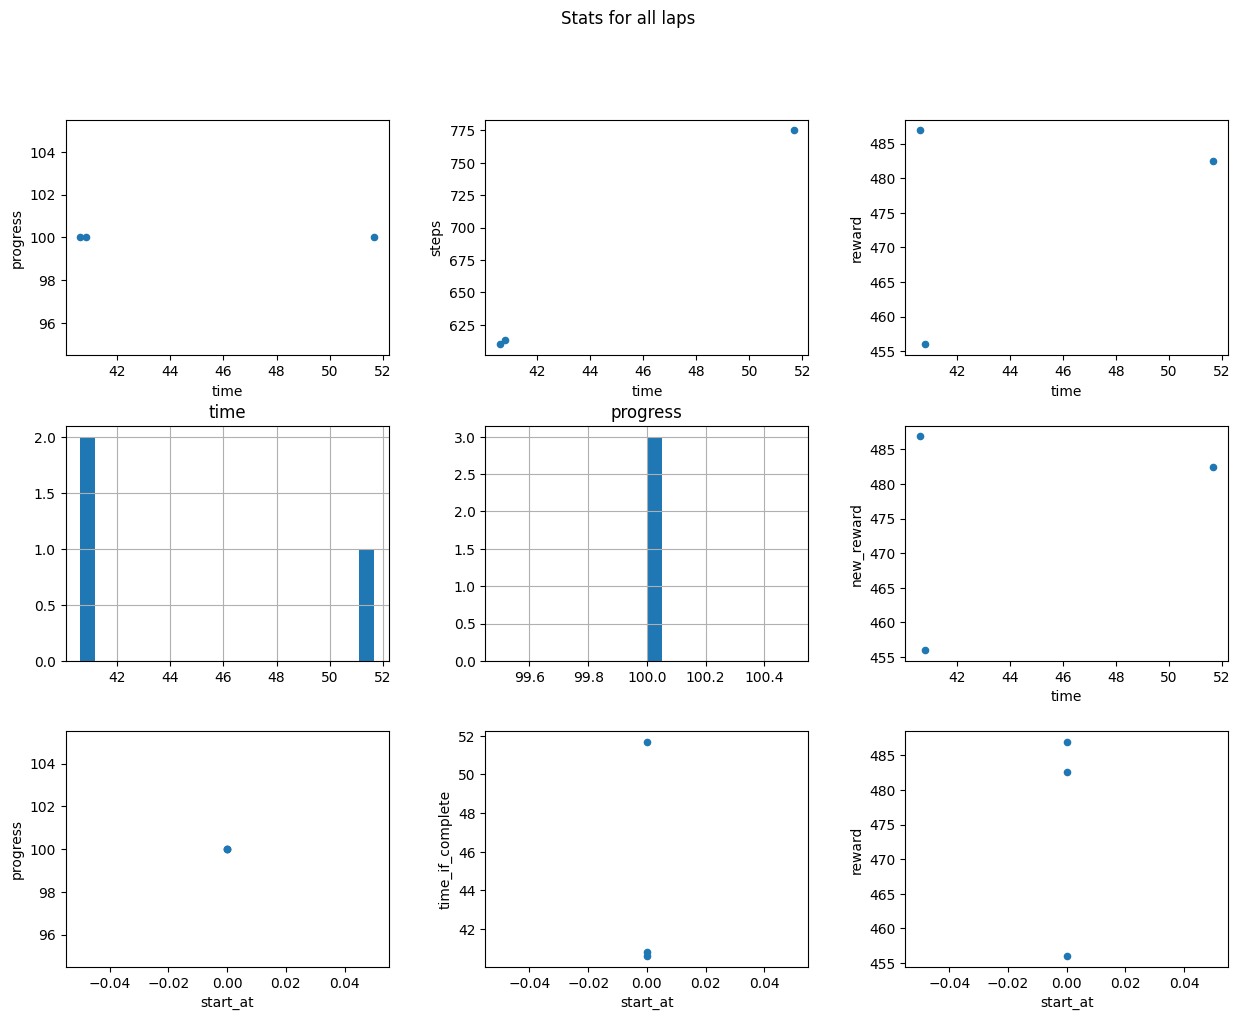

<Figure size 640x480 with 0 Axes>

In [7]:
au.scatter_aggregates(simulation_agg, 'Stats for all laps')

### Unlike the previous diagram, this diagram only outputs the data of the completed course

The following code filters out all lines from the simulation_agg data box with progress equal to 100. A progress equal to 100 means that the agent successfully completed the entire course in that episode. The filtered results are stored in complete_ones. If this value is greater than 0, the agent successfully completed the entire course in at least one episode. If there is at least one complete loop, this line of code generates a scatter plot showing statistics for all completed loops.

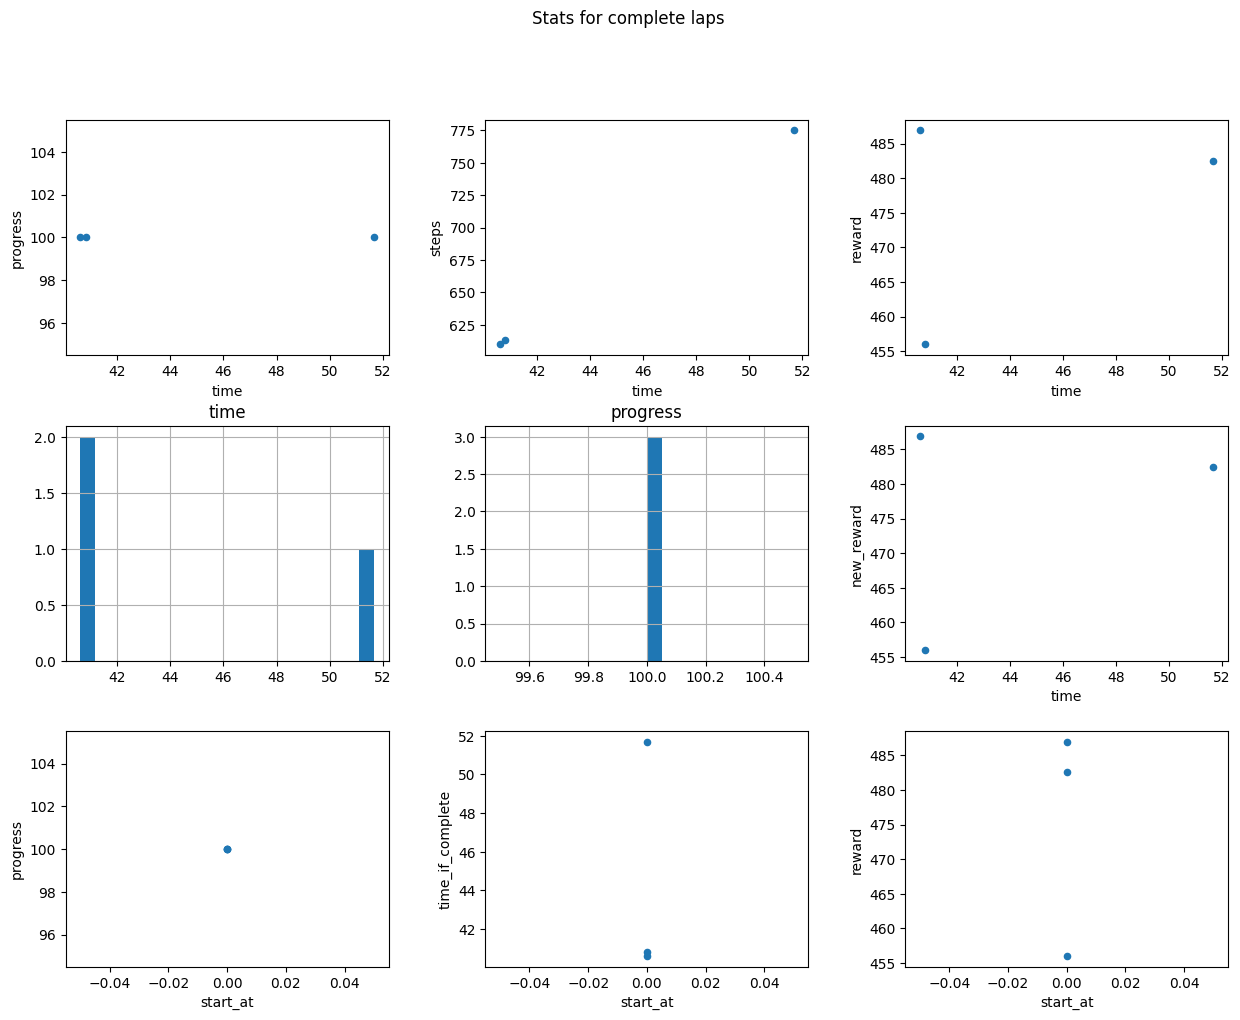

<Figure size 640x480 with 0 Axes>

In [8]:
complete_ones = simulation_agg[simulation_agg['progress']==100]
# Filter out all rows with progress equal to 100 from the simulation_agg data box. 
# A progress equal to 100 means that the agent successfully completed the entire course in that episode. 
# The filtered results are stored in complete_ones.

if complete_ones.shape[0] > 0:
    au.scatter_aggregates(complete_ones, 'Stats for complete laps')
else:
    print('No complete laps yet.')

## View five most progressed episodes

The top five episodes with the highest percentage of track completed.
You can get more values by changing the number 5

In [9]:
# View five most progressed episodes
simulation_agg.nlargest(5, 'progress')

,iteration,episode,steps,start_at,progress,time,dist,new_reward,speed,reward,time_if_complete,reward_if_complete,quintile,complete
0,1,0,775,0,100.0,51.672,35.330404,482.522,0.731858,482.522,51.672,482.522,1st,1
1,2,1,610,0,100.0,40.602,31.291110,486.900,0.698852,486.900,40.602,486.900,3rd,1
2,3,2,613,0,100.0,40.803,31.256211,456.002,0.691403,456.002,40.803,456.002,5th,1


## View five best rewarded in completed laps

You can get more values by changing the number 5

In [14]:
# View five best rewarded in completed laps
complete_ones.nlargest(5, 'reward')

,iteration,episode,steps,start_at,progress,time,dist,new_reward,speed,reward,time_if_complete,reward_if_complete,quintile,complete
1,2,1,610,0,100.0,40.602,31.291110,486.900,0.698852,486.900,40.602,486.900,3rd,1
0,1,0,775,0,100.0,51.672,35.330404,482.522,0.731858,482.522,51.672,482.522,1st,1
2,3,2,613,0,100.0,40.803,31.256211,456.002,0.691403,456.002,40.803,456.002,5th,1


## View information for a couple last episodes

You can view information about the last five episodes. This is useful for keeping up to date on the training process and how the agent is performing.

<br />
You can get more values by changing the number 5

In [13]:
# View information for a couple last episodes
simulation_agg.tail()

,iteration,episode,steps,start_at,progress,time,dist,new_reward,speed,reward,time_if_complete,reward_if_complete,quintile,complete
0,1,0,775,0,100.0,51.672,35.330404,482.522,0.731858,482.522,51.672,482.522,1st,1
1,2,1,610,0,100.0,40.602,31.291110,486.900,0.698852,486.900,40.602,486.900,3rd,1
2,3,2,613,0,100.0,40.803,31.256211,456.002,0.691403,456.002,40.803,456.002,5th,1


## View all step data from episode 1

This code helps us view all step data from episode 1 in detail, providing us with deeper analysis and the possibility of understanding the training process.

In [15]:
# Set maximum quantity of rows to view for a dataframe display - without that
# the view below will just hide some of the steps
pd.set_option('display.max_rows', 500)

# View all steps data for episode 1
df[df['episode']==1]

,iteration,episode,steps,x,y,yaw,steering_angle,speed,action,reward,...,on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration,delta_time,delta_dist,new_reward
775,2,1,1,0.6159,0.4623,131.5626,12.22,0.70,-1,0.0,...,True,0.4214,0,33.28,60.219,prepare,0.0,0.000,0.000000,0.0
776,2,1,2,0.6160,0.4620,131.5773,-11.91,0.50,-1,1.0,...,True,0.4207,0,33.28,60.288,in_progress,0.0,0.069,0.000316,1.0
777,2,1,3,0.6140,0.4700,130.4702,-1.26,0.57,-1,1.0,...,True,0.4426,0,33.28,60.356,in_progress,0.0,0.068,0.008246,1.0
778,2,1,4,0.6064,0.4833,129.7515,10.34,0.66,-1,1.0,...,True,0.4876,1,33.28,60.42,in_progress,0.0,0.064,0.015318,1.0
779,2,1,5,0.5887,0.5029,130.0094,9.74,0.62,-1,1.0,...,True,0.5669,1,33.28,60.485,in_progress,0.0,0.065,0.026409,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,2,1,606,0.8835,0.2727,126.6468,30.00,0.64,-1,1.0,...,True,99.4615,110,33.28,100.555,in_progress,0.0,0.068,0.050735,1.0
1381,2,1,607,0.8442,0.3030,129.7891,1.42,1.00,-1,1.0,...,True,99.6080,111,33.28,100.62,in_progress,0.0,0.065,0.049624,1.0
1382,2,1,608,0.8015,0.3422,131.4939,30.00,0.82,-1,1.0,...,True,99.7814,111,33.28,100.683,in_progress,0.0,0.063,0.057965,1.0
1383,2,1,609,0.7624,0.3863,131.5190,-1.65,0.84,-1,1.0,...,True,99.9584,111,33.28,100.755,in_progress,0.0,0.072,0.058937,1.0
